# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [395]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [396]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [397]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [398]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [399]:
app_train['DAYS_BIRTH_AGE'] = round(app_train["DAYS_BIRTH"] / 365)
app_train['DAYS_BIRTH_AGE']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH_AGE, Length: 307511, dtype: float64

In [400]:
app_train['DAYS_BIRTH_AGE'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH_AGE, dtype: float64

In [401]:
bins = np.linspace(20,70,6)
app_train['DAYS_BIRTH_AGE_BINNED'] = pd.cut(app_train['DAYS_BIRTH_AGE'], bins)
app_train['DAYS_BIRTH_AGE_BINNED'].describe()

count           307511
unique               5
top       (30.0, 40.0]
freq             82770
Name: DAYS_BIRTH_AGE_BINNED, dtype: object

In [402]:
app_train['DAYS_BIRTH_AGE_BINNED'].value_counts()

(30.0, 40.0]    82770
(40.0, 50.0]    75509
(50.0, 60.0]    67955
(20.0, 30.0]    48869
(60.0, 70.0]    32408
Name: DAYS_BIRTH_AGE_BINNED, dtype: int64

(array([41093., 81944., 77415., 68039., 39020.]),
 array([20., 30., 40., 50., 60., 70.]),
 <a list of 5 Patch objects>)

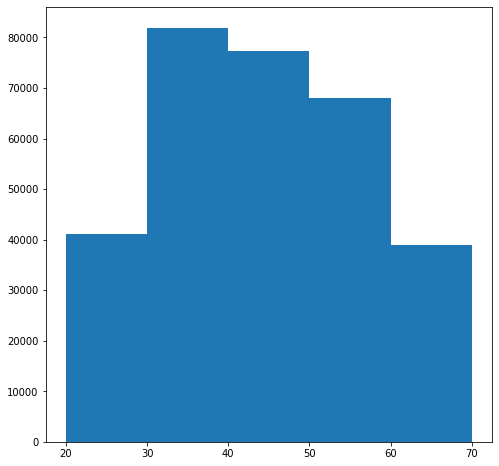

In [403]:
plt.figure(figsize = (8, 8))

plt.hist(app_train['DAYS_BIRTH_AGE'], bins=bins)

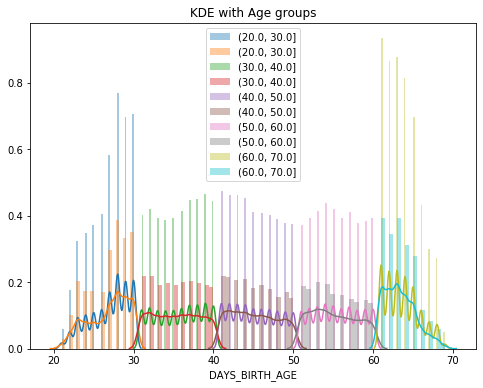

In [404]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
##資料重覆要 unique再sort
year_group_sorted = app_train['DAYS_BIRTH_AGE_BINNED'].sort_values().unique()


plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_AGE_BINNED'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'DAYS_BIRTH_AGE'], label = str(year_group_sorted[i]))
    
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_AGE_BINNED'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'DAYS_BIRTH_AGE'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.legend()
plt.show()

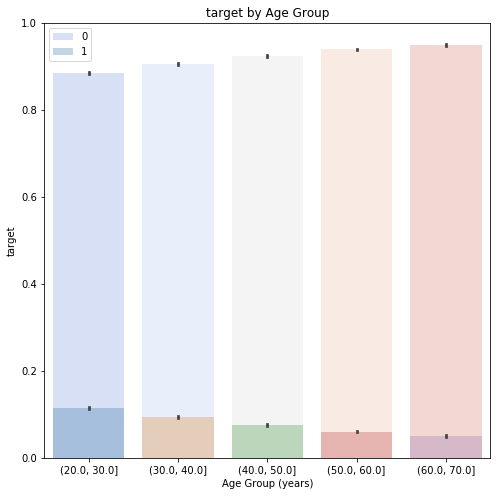

In [405]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""

#px = 'DAYS_BIRTH_AGE_BINNED' #same as app_train['DAYS_BIRTH_AGE_BINNED']
#py = 'TARGET' #same as app_train['TARGET']
sns.barplot(app_train['DAYS_BIRTH_AGE_BINNED'],app_train['TARGET']==0,label='0',alpha=0.3,palette='coolwarm') #same as sns.barplot(px, py)
sns.barplot(app_train['DAYS_BIRTH_AGE_BINNED'],app_train['TARGET']==1,label='1',alpha=0.3)

# Plot labeling
##plt.xticks(rotation = 75); 
plt.legend()
plt.xlabel('Age Group (years)'); 
plt.ylabel('target')
plt.title('target by Age Group');